In [36]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [37]:
df1=pd.read_csv('salary.csv')

In [38]:
df1

,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,A,36,5,5,2297
1,1,A,55,3,5,1134
2,2,A,61,8,1,4969
3,3,O,29,3,6,902
4,4,O,34,6,2,3574
...,...,...,...,...,...,...
282,282,A,54,6,2,3574
283,283,O,35,7,3,3923
284,284,O,18,2,4,785
285,285,O,45,6,8,2182


In [39]:
df1.head()

,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,A,36,5,5,2297
1,1,A,55,3,5,1134
2,2,A,61,8,1,4969
3,3,O,29,3,6,902
4,4,O,34,6,2,3574


In [40]:
df1.dtypes

id                   int64
groups              object
age                  int64
healthy_eating       int64
active_lifestyle     int64
salary               int64
dtype: object

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le=LabelEncoder()

In [43]:
df1["groups"]=le.fit_transform(df1['groups'])

In [44]:
df1.dtypes

id                  int64
groups              int32
age                 int64
healthy_eating      int64
active_lifestyle    int64
salary              int64
dtype: object

In [45]:
df1.head()

,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,0,36,5,5,2297
1,1,0,55,3,5,1134
2,2,0,61,8,1,4969
3,3,3,29,3,6,902
4,4,3,34,6,2,3574


In [46]:
df=df1 #copying the original dataset to another

In [47]:
df.tail()

,id,groups,age,healthy_eating,active_lifestyle,salary
282,282,0,54,6,2,3574
283,283,3,35,7,3,3923
284,284,3,18,2,4,785
285,285,3,45,6,8,2182
286,286,1,58,6,7,2414


In [48]:
df.shape

(287, 6)

In [49]:
x=df.iloc[:,0:-1]

In [50]:
x.head()

,id,groups,age,healthy_eating,active_lifestyle
0,0,0,36,5,5
1,1,0,55,3,5
2,2,0,61,8,1
3,3,3,29,3,6
4,4,3,34,6,2


In [51]:
y=df.iloc[:,-1].values

In [52]:
y=y.reshape(-1,1)

In [53]:
y.shape

(287, 1)

In [54]:
x.shape

(287, 5)

In [55]:
df.drop('id',axis=1,inplace=True)

In [56]:
df.head()

,groups,age,healthy_eating,active_lifestyle,salary
0,0,36,5,5,2297
1,0,55,3,5,1134
2,0,61,8,1,4969
3,3,29,3,6,902
4,3,34,6,2,3574


In [57]:
#data visualisation

In [58]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   groups            287 non-null    int32
 1   age               287 non-null    int64
 2   healthy_eating    287 non-null    int64
 3   active_lifestyle  287 non-null    int64
 4   salary            287 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 10.2 KB


In [60]:
df.describe()

,groups,age,healthy_eating,active_lifestyle,salary
count,287.000000,287.000000,287.000000,287.000000,287.000000
mean,1.498258,42.101045,5.059233,5.599303,2289.627178
std,1.327163,13.539126,1.982434,2.101381,1119.181399
min,0.000000,18.000000,0.000000,1.000000,556.000000
25%,0.000000,31.000000,3.500000,4.000000,1475.000000
50%,1.000000,43.000000,5.000000,6.000000,2182.000000
75%,3.000000,54.000000,6.000000,7.000000,2996.000000
max,3.000000,64.000000,10.000000,10.000000,5435.000000


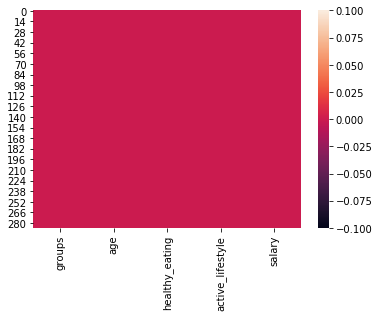

In [61]:
sns.heatmap(df.isnull())

In [62]:
co=df.corr()

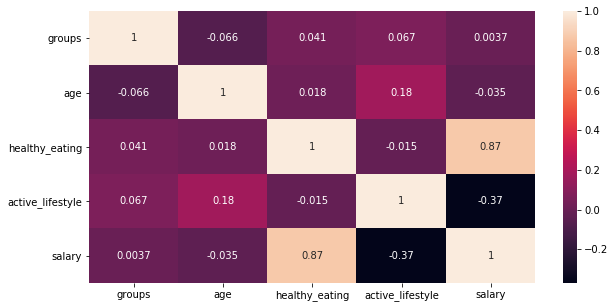

In [63]:
plt.figure(figsize=(10,5))
sns.heatmap(co,annot=True)

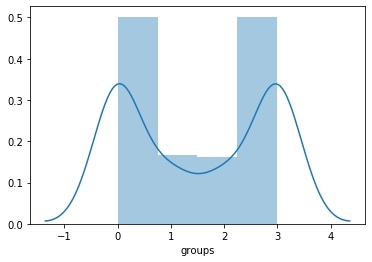

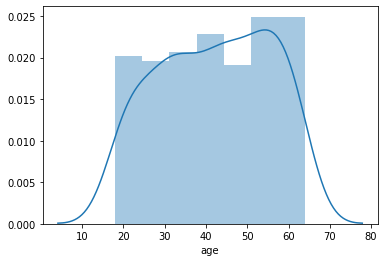

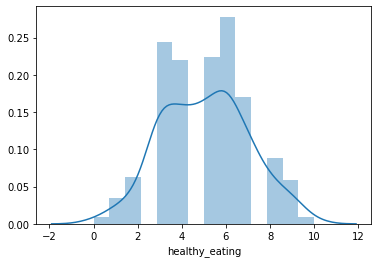

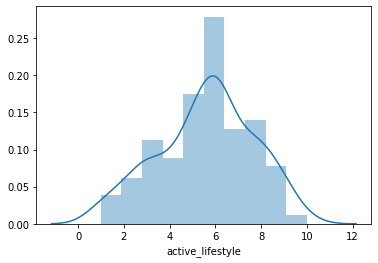

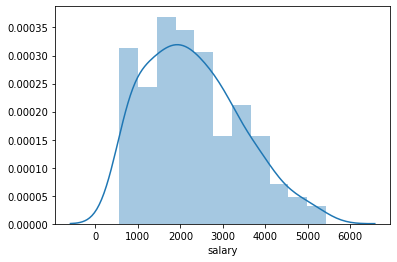

In [64]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

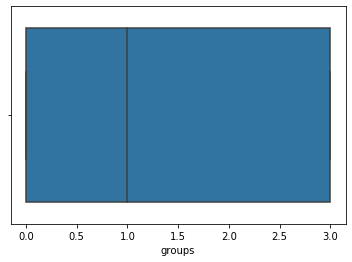

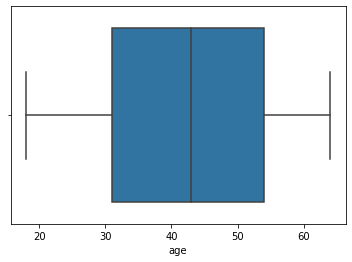

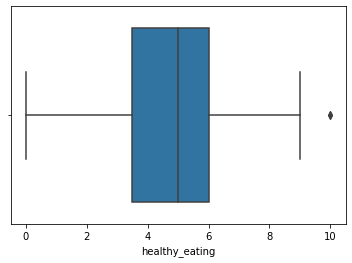

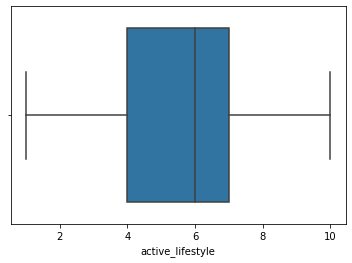

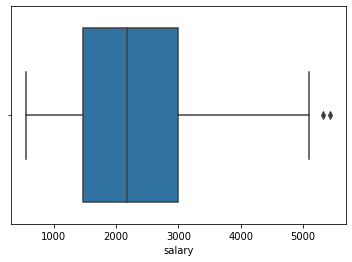

In [65]:
for i in df.columns:
    plt.figure()
    sns.boxplot(df[i])

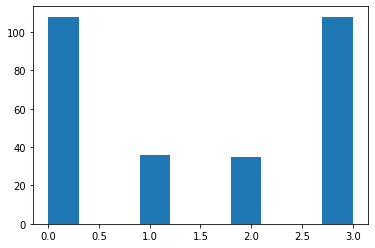

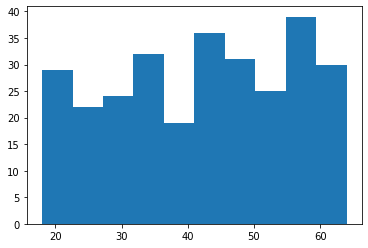

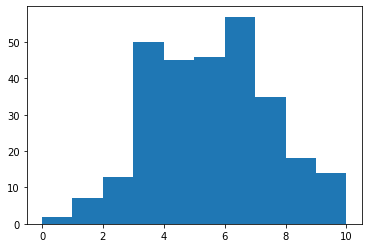

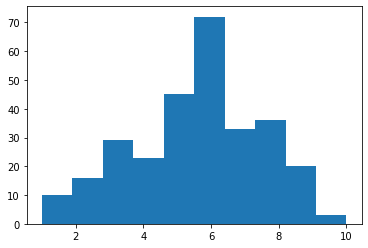

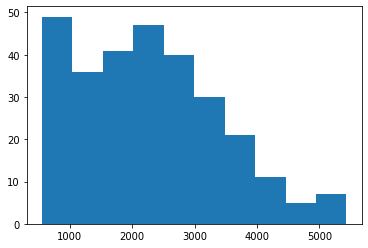

In [66]:
for i in df.columns:
    plt.figure()
    plt.hist(df[i])

In [67]:
df.skew()

groups              0.003777
age                -0.128774
healthy_eating      0.066528
active_lifestyle   -0.264247
salary              0.521475
dtype: float64

In [69]:
df['salary']=np.log(df['salary'])

(array([15.,  9., 25., 22., 36., 46., 36., 50., 31., 17.]),
 array([6.32076829, 6.54875294, 6.7767376 , 7.00472225, 7.2327069 ,
        7.46069155, 7.6886762 , 7.91666085, 8.1446455 , 8.37263015,
        8.6006148 ]),
 <a list of 10 Patch objects>)

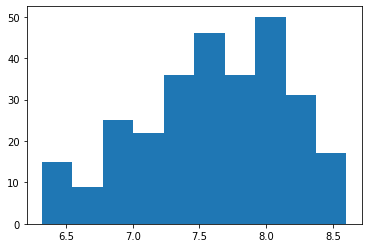

In [70]:
plt.hist(df['salary'])

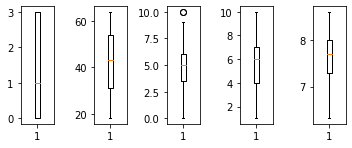

In [77]:
collist=df.columns.values
nrows=5
ncol=5
plt.figure(figsize=(nrows,ncol*2))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    plt.boxplot(df[collist[i]])
    plt.tight_layout()

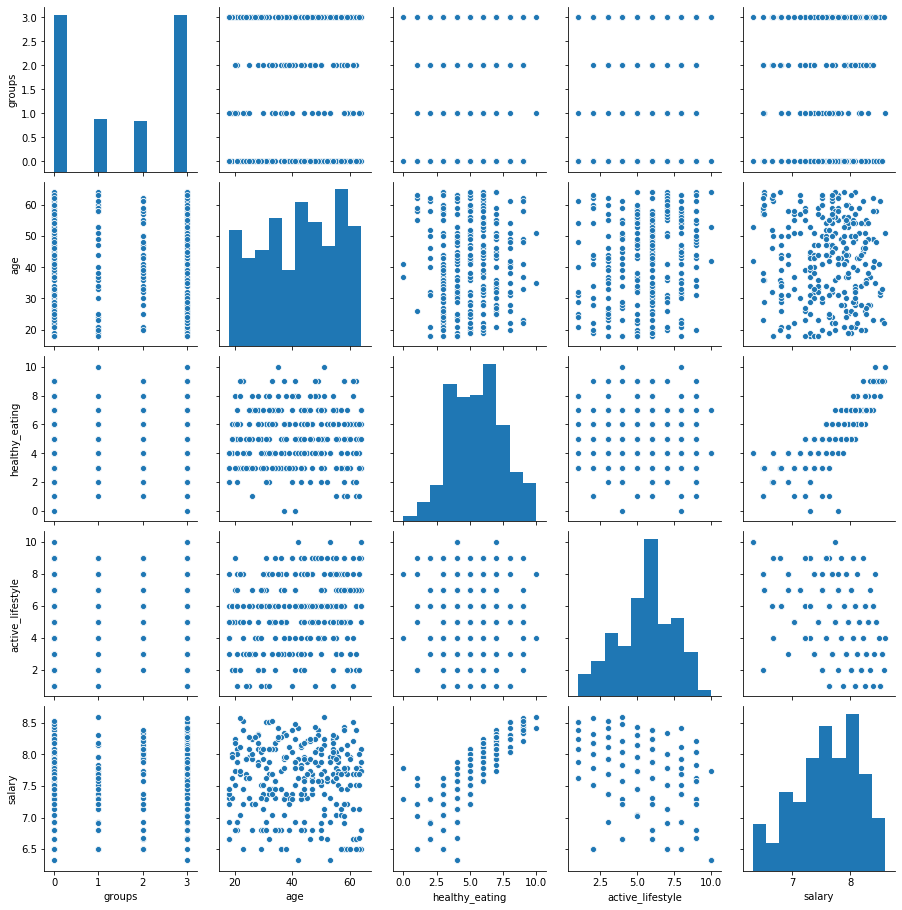

In [78]:
sns.pairplot(df)

In [80]:
#checking and removing the outliers
from scipy.stats import zscore

In [81]:
z=np.abs(zscore(df))

In [84]:
threshold=2.5
print(np.where(z>2.5))

(array([133, 218], dtype=int64), array([2, 2], dtype=int64))


In [85]:
df_new=df[(z<2.5).all(axis=1)]

In [86]:
df.shape

(287, 5)

In [87]:
df_new.shape

(285, 5)

In [88]:
#implementing Linear regression algorithm

In [89]:
max_r2_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.33)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2_scr=r2_score(pred,y_test)
    print("r2 score corrosponding to random state",r_state,"is:",r2_scr)
    if r2_scr>max_r2_score:
        max_r2_score=r2_scr
        final_r_state=r_state

print()
print()
print("max r2 score for the final random state:",r_state,"is: ",max_r2_score)        

r2 score corrosponding to random state 42 is: 0.9010025465921848
r2 score corrosponding to random state 43 is: 0.8857225364338625
r2 score corrosponding to random state 44 is: 0.8926552264444098
r2 score corrosponding to random state 45 is: 0.8413911402391887
r2 score corrosponding to random state 46 is: 0.9143758327761529
r2 score corrosponding to random state 47 is: 0.9159919323489168
r2 score corrosponding to random state 48 is: 0.8379704122888353
r2 score corrosponding to random state 49 is: 0.9068723760996276
r2 score corrosponding to random state 50 is: 0.9146137815316789
r2 score corrosponding to random state 51 is: 0.897334427056943
r2 score corrosponding to random state 52 is: 0.8334215741539599
r2 score corrosponding to random state 53 is: 0.8526779757378924
r2 score corrosponding to random state 54 is: 0.8405731834602855
r2 score corrosponding to random state 55 is: 0.9139495127748863
r2 score corrosponding to random state 56 is: 0.8831037267964691
r2 score corrosponding to 

In [90]:
#finalising the model

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99,test_size=0.33)

In [93]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
lr.intercept_

array([835.39675568])

In [95]:
lr.coef_

array([[ 2.80996296e-01, -1.88466984e+01,  5.16365325e-01,
         4.97827083e+02, -1.94327024e+02]])

In [96]:
pred1=lr.predict(x_test)

In [125]:
from numpy import sqrt
print("r2 score of the model is:",r2_score(y_test,pred))
print("root mean squared error of the model is",sqrt(mean_squared_error(y_test,pred)))
print("mean abs error of the model is",mean_absolute_error(y_test,pred))

r2 score of the model is: 0.8193168825520746
root mean squared error of the model is 453.93357790153374
mean abs error of the model is 224.42392170021122


In [97]:
print("actual result:",y_test,"****","predicted result",pred1)

actual result: [[ 667]
 [3574]
 [3809]
 [1716]
 [4969]
 [3113]
 [1716]
 [4508]
 [ 662]
 [ 902]
 [3228]
 [1366]
 [ 662]
 [3923]
 [3228]
 [2297]
 [1020]
 [1950]
 [2646]
 [2646]
 [3574]
 [4390]
 [2179]
 [1366]
 [1716]
 [ 902]
 [2297]
 [1950]
 [2297]
 [2182]
 [2878]
 [1134]
 [ 788]
 [2761]
 [1369]
 [1948]
 [1020]
 [ 667]
 [1833]
 [2065]
 [ 556]
 [1484]
 [1128]
 [2878]
 [1601]
 [2062]
 [2297]
 [3574]
 [1366]
 [1716]
 [4969]
 [1950]
 [2065]
 [2529]
 [2993]
 [2529]
 [2182]
 [1252]
 [3342]
 [1484]
 [1598]
 [3225]
 [2179]
 [2878]
 [ 902]
 [ 662]
 [2182]
 [ 670]
 [2056]
 [2761]
 [1366]
 [3110]
 [1134]
 [1369]
 [1598]
 [1020]
 [3228]
 [3809]
 [2065]
 [1601]
 [ 894]
 [3460]
 [3228]
 [ 894]
 [ 902]
 [2406]
 [ 902]
 [ 902]
 [4390]
 [2065]
 [1134]
 [1950]
 [2761]
 [1020]
 [1833]] **** predicted result [[ 979.07351525]
 [3483.07105175]
 [3637.49583412]
 [1876.44040682]
 [4655.74667366]
 [3089.60090599]
 [1920.56380517]
 [4277.62633673]
 [ 770.21618759]
 [1194.52209942]
 [3204.39090522]
 [1538.77175182

In [146]:
#regularizing in model to avoid underfitting and overfitting

In [99]:
from sklearn.linear_model import Lasso,Ridge 

In [101]:
ls=Lasso(alpha=0.01)

In [102]:
ls.fit(x_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [104]:
ls.coef_

array([ 2.80996978e-01, -1.88411899e+01,  5.16295065e-01,  4.97824449e+02,
       -1.94324687e+02])

<BarContainer object of 5 artists>

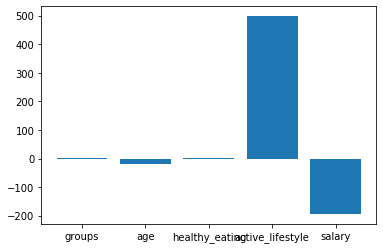

In [105]:
plt.bar(df.columns,ls.coef_)

In [116]:
rd=Ridge(alpha=0.1)

In [117]:
rd.fit(x_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [118]:
rd.coef_

array([[ 2.81006299e-01, -1.88381427e+01,  5.15693990e-01,
         4.97763380e+02, -1.94302605e+02]])

In [119]:
from sklearn.model_selection import cross_val_score

In [120]:
score=cross_val_score(lr,x,y,cv=5)

In [121]:
score

array([0.93607314, 0.88138325, 0.72928248, 0.92740796, 0.88736632])

In [126]:
#boosting the result using adaboost regressor

In [127]:
from sklearn.ensemble import AdaBoostRegressor

In [128]:
ad=AdaBoostRegressor()

In [130]:
ad.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [131]:
predad=ad.predict(x_test)

In [132]:
r2_score(y_test,predad)

0.9094586605302297

In [133]:
#using other algorithm

In [134]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [135]:
model=[DecisionTreeRegressor(),KNeighborsRegressor(),SVR()]

In [136]:
for i in model:
    i.fit(x_train,y_train)
    pred3=i.predict(x_test)
    print("r2 score of",i,"is:",r2_score(y_test,pred3))
    print("mean abs error of",i,"is:",mean_absolute_error(y_test,pred3))
    print("root mean square error of",i,"is:",sqrt(mean_squared_error(y_test,pred3)))

r2 score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is: 0.9584473124981719
mean abs error of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is: 75.82105263157895
root mean square error of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_f

In [137]:
#seriaization--->dumping the final model

In [138]:
from sklearn.externals import joblib

In [141]:
svm=SVR()

In [143]:
svm.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [144]:
joblib.dump(svm,'salarydata.obj')

['salarydata.obj']

In [145]:
#######end\\\\\